In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 9.1 군집

* 비슷한 샘플을 클러스터(Cluster)로 모은다. 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있다.
* 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업

In [2]:
# iris 분류 / 군집

from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

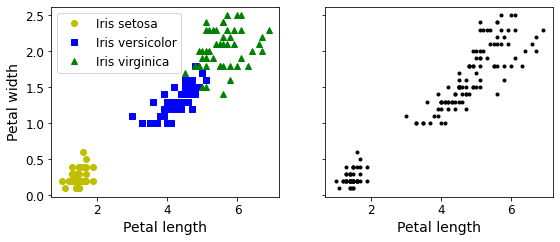

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

* 클러스터에 대한 보편적인 정의는 없다.
 - 어떤 알고리즘은 센트로이드(Centroid)라 부르는 특정 포인트를 중심으로 모인 샘플을 찾는다.
 - 어떤 알고리즘은 샘플이 밀집되어 연속된 영역을 찾는다.

## 9.1.1 K-평균

* k-평균은 반복 몇 번으로 이런 종류의 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 간단한 알고리즘

In [4]:
#데이터 셋
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

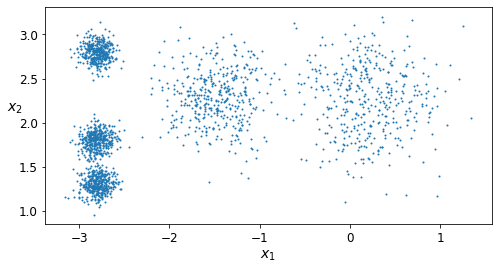

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [6]:
#위 데이터셋의 k-평균 알고리즘 훈련과 예측
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 4, 1, ..., 2, 1, 4])

In [7]:
#KMeans 클래스의 인스턴스는 labels_ 인스턴스 변수에 훈련된 샘플의 레이블을 가지고 있다.
y_pred is kmeans.labels_

True

In [8]:
#k-means 알고리즘이 찾은 센트로이드 5개
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [9]:
#새로운 샘플의 레이블 예측
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

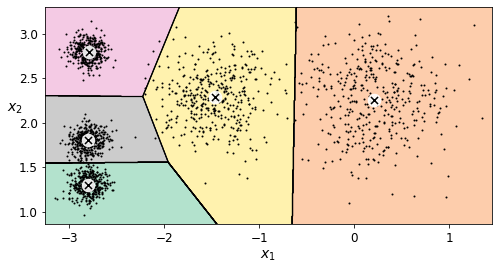

In [10]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

* 샘플들은 대부분 적잘한 클러스터에 잘 할당 되었지만, 몇몇의 샘플들은 레이블이 잘못 부여되었다.
* k-평균 알고리즘은 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문에 클러스터의 크기가 많이 다르면 잘 작동하지 않는다.

* 하드 군집(Hard Clustering) : 샘플을 하나의 클러스터에 할당하는것
* 소프트 군집(Soft Clustering) : 클러스터마다 샘플에 점수를 부여하는 것
 - 이 점수는 샘플과 센트로이드 사이의 거리가 될 수 있다.
 - 가우시안 방사기저 함수와 같은 유사도 점수도 될 수 있다.

In [11]:
#KMeans 클래스의 transform()메소드는 샘플과 각 센트로이드 사이의 거리 반환
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

In [12]:
#이 거리가 샘플과 센트로이드 사이의 유클리드거리인지 확인
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

* K-평균 알고리즘
 - 먼저 k개의 센트로이드를 랜덤하게 초기화. 데이터셋에서 k개의 샘플을 랜덤하게 선택하고 센트로이드를 그 위치에 놓는다.
 - 수렴할 때 까지 다음을 반복(센트로이드가 더 이상 이동하지 않을 때 까지)
   - 각 샘플을 가장 가까운 센트로이드에 할당
   - 센트로이드에 할당된 샘플의 평균으로 센트로이드를 업데이트

In [13]:
#센트로이드 업데이트
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=9)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=9)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=9)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=9)

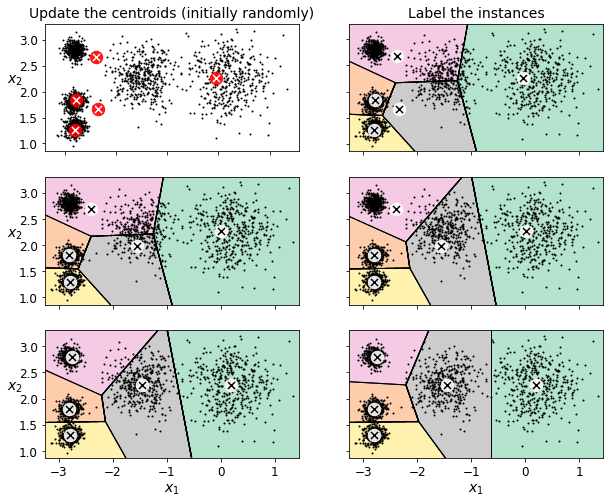

In [14]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

* K-평균의 변동성
 - k-평균 알고리즘에서 센트로이드가 그냥 랜덤하게 초기화되고, 알고리즘은 단순히 한번씩 반복하여 앞서 본 것처럼 점차 센트로이드를 개선시킨다.
 - 랜덤한 초기화 단계에서 운이 없을 떄 알고리즘이 수렴할 수 있는 최적이 아닐 수도 있다.


In [15]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

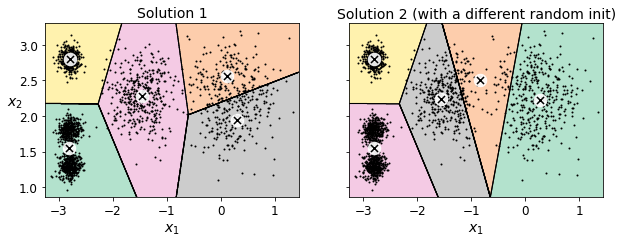

In [16]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=42)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=51)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

* 센트로이드 초기화 방법
 - 센트로이드 위치를 알 수 있다면 init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init를 1로 설정할 수 있다.
 - 랜덤 초기화를 다르게 하여 여러번 알고리즘을 실행하고 가장 좋은 솔루션을 선택하는 방법도 있다.
   - n_init : 랜덤 초기화 횟수, defaiut = 10

In [17]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters = 5, init=good_init, n_init = 1)

In [18]:
print(kmeans_rnd_init1.inertia_)
print(kmeans_rnd_init2.inertia_)

219.50265127189658
236.63519259650343


In [19]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

* 이너셔((Inertia))
 - 최선의 솔루션인지를 평가하기 위한 성능지표가 있다. 이 값은 각 샘플과 가장 가까운 센트로이디 사이의 평균 제곱 거리이며 모델의 이너셔(Inertia)라고 한다.

In [20]:
#inertia_ 인스턴스 변수로 모델의 이너셔 확인
print(kmeans.inertia_)

#score()메소드는 이너셔의 음숫값 반환
print(kmeans.score(X))

211.5985372581683
-211.5985372581683


In [21]:
#센트로이드 사이의 제곱 거리의 합으로 이너셔 검증
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816805

* K-평균 ++
 - 데이비드 아서(David Arthur) 와 세르게이 바실비츠키(Sergei Vassilvitskii)가 2006년 논문에서 k-평균 알고리즘을 향상시킨 k-평균++ 알고리즘을 제안
 - 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계를 사용
 - k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춤
 - K-평균++ 알고리즘의 나머지는 일반 K-평균과 같습니다. 이 초기화 방식을 사용하면 K-평균 알고리즘이 최적의 솔루션에 수렴할 가능성이 훨씬 높아집니다. 따라서 n_init 값을 상당히 줄일 수 있습니다. 대부분의 경우 n_init를 줄이는 것이 초기화 과정에 추가된 복잡도를 보상한다.
 
1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c_1$을 선택합니다.
2. $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$의 확률로 샘플 $\mathbf{x}_i$를 새로운 센트로이드 $c_i$로 선택합니다. 여기에서 $D(\mathbf{x}_i)$는 샘플 $\mathbf{x}_i$에서 이미 선택된 가장 가까운 센트로이드까지 거리입니다. 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 센트로이드로 선택할 가능성을 높입니다.
3. $k$ 개의 센트로이드를 선택할 때까지 이전 단계를 반복합니다.


In [22]:
#K-평균++ 사용하기 위해서는 init="k-means++"로 지정
KMeans()

KMeans()

In [23]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.62337889822365

* K-평균 속도 개선과 미니배치 k-평균
 - 2013년 찰스 엘칸(Charles Elkan)의 논문
   - 불필요한 거리 계산을 많이 피함으로서 알고리즘의 속도를 상당히 높일 수 있다.
   - 이를 위해 삼각 부등식을 사용한다.(3개의 포인트 A, B, C에 대해서 AC ≤ AB + BC)
   - 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지한다. 
   
 - 데이비드 스컬리(David Sculley)
    - 전체 데이터셋을 사용해 반복하지 않고 이 알고리즘은 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동한다.

In [24]:
#Elkan의 k-평균 방식
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

76.9 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [25]:
#원래 알고리즘을 사용하려면 full
%timeit -n 50 KMeans(algorithm="full").fit(X)

169 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [26]:
#미니배체
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [27]:
minibatch_kmeans.inertia_

212.35468381852246

In [28]:
#훈련시간 시각화
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

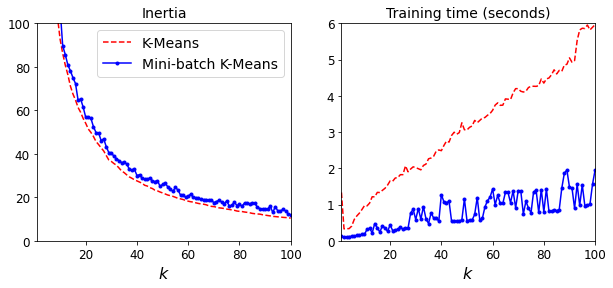

In [29]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

* 미니배치 k-평균 알고리즘이 일반 k-평균 알고리즘보다 훨씬 빠르지만 이너셔는 일반적으로 조금 더 나쁘다. 특히 클러스터의 개수가 증가할 때 그렇다.

* 최적의 클러스터 개수 찾기

 - 이니셔는 k가 증가함에 따라 점점 작아지므로 k를 선택할 때 좋은 성능 지표가 아니다. 실제로 클러스터가 늘어날 수록 각 샘플은 가까운 센트로이드에 더 가깝게 되기 때문이다.
 - 밑의 그래프를 보면 k=4일때 엘보우가 있는데, 이 값보다 클러스터가 작으면 나쁘다는 뜻이다.
 - 실루엣 점수(Silhouette Score) : 모든 샘플에 대한 실루엣 계수( (b-a) / max(a, b) )
   - a : 동일한 클러스터에 있는 다른 샘플까지 평균 거리 (클러스터 내부의 평균 거리)
   - b : 가장 가까운 클러스터까지 평균 거리 (가장 가까운 클러스터의 샘플까지 평균 거리)
   - -1 ~  +1 (+1에 가까울 수록 클러스터안에 잘 속해 있다는 뜻)

In [30]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

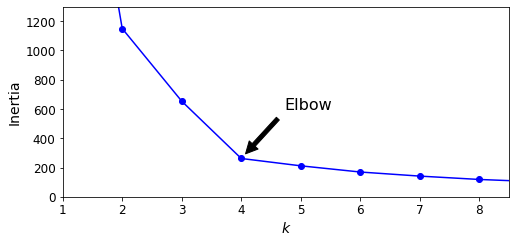

In [31]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [32]:
#사이킷런의 silhouette_score()
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [33]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

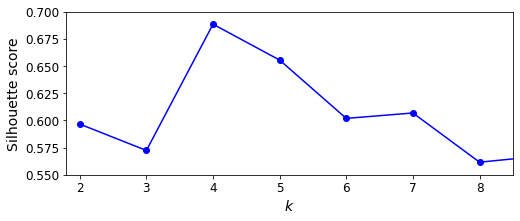

In [34]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

* 실루엣 다이어그램(Silhouette Diagram) : 모든 샘플의 실루엣 계수는 할당된 클러스터와 계숫값으로 정렬하여 그리면 더 많은 정보가 있는 그래프를 얻을 수 있다.
 - 그래프의 높이 : 클러스터가 포함하고 있는 샘플의 개수
 - 그래프의 너비 : 이 클래스에 포함된 샘플의 정렬된 실루엣 계수
 - 수직 파선 : 각 클러스터 개수에 해당하는 실루엣 점수(파선을 넘으면 좋음)

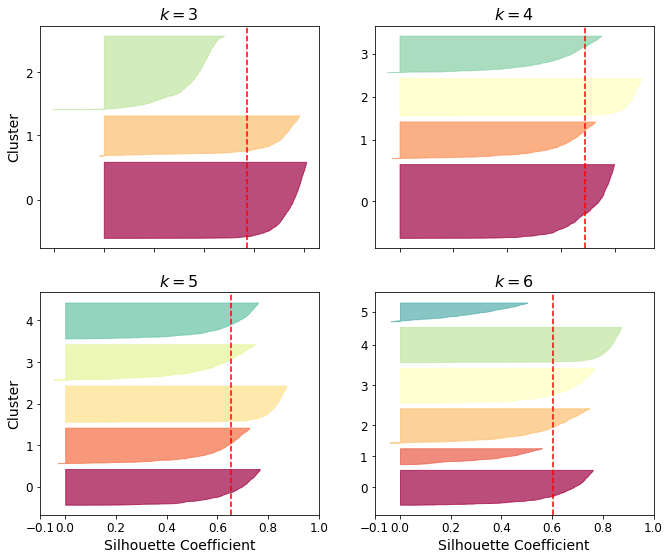

In [35]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

    
plt.show()

## 9.1.2 k-평균의 한계

* k-평균은 속도가 빠르고 확장이 용이하다는 장점이 있다.
* 하지만 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 한다. 또한 클러스터 개수를 지정해야 한다. 그리고 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다.

In [36]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

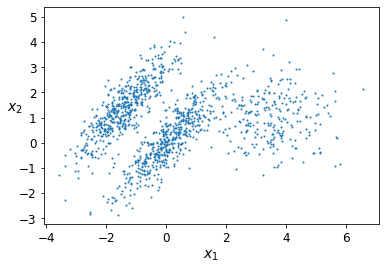

In [37]:
plot_clusters(X)

In [38]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

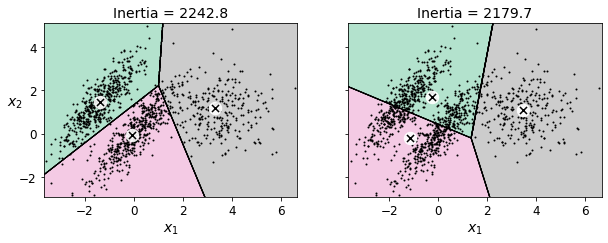

In [39]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

## 9.1.3 군집을 사용한 이미지 분할

* 이미지 분할(Image Segmentation) : 이미지를 세그먼트 여러개로 분할하는 작업
* 시맨틱 분할(Semantic Segmentation) : 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당된다.
* 여기서는 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당하는 색상 분할(Color Segmentation)

In [42]:
# 무당벌레 이미지를 다운로드합니다
import urllib
PROJECT_ROOT_DIR = 'images/9_images/'
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('images/9_images/images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x228af75f430>)

In [43]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape
#이미지를 3D 배열로 표현, 첫 번째 차원의 크기 높이, 너비, 컬러 채널 개수

(533, 800, 3)

In [44]:
#이미지 배열을 RGB 색상의 리스트로 변환한 다음 k=평균 적용
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [45]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

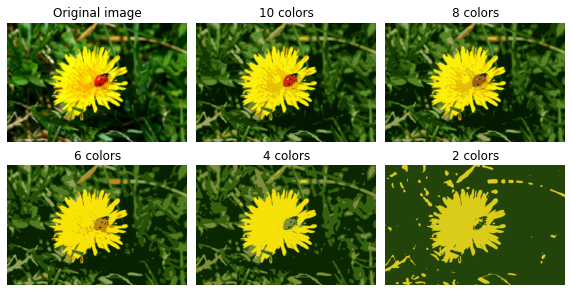

In [46]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## 9.1.4 군집을 사용한 전처리

* 군집은 차원 축소에 효과적인 방법으로 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용할 수 있다.

In [47]:
#전처리 전 로지스틱 회귀
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [50]:
log_reg.score(X_test, y_test)

0.9688888888888889

In [51]:
#k-평균을 전처리 단계로 사용(이미지를 50개 클러스터까지 거리로 바꾼다.)
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [52]:
pipeline.score(X_test, y_test)

0.98

In [53]:
#차이
1 - (1 - 0.977777) / (1 - 0.968888)

0.28570969400874346

In [54]:
# GridSearchCV, 교차검증에서 가장 좋은 분류 성능 찾기
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose = 2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 12.3min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [55]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 57}
0.98


## 9.1.5 군집을 사용한 준지도 학습

* 준지도 학습에도 군집을 사용한다.
* 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용

In [56]:
#레이블을 가진 샘플이 50개만 있을때 로지스틱 회귀
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [57]:
#먼저 훈련세트를 클러스터 50개로 군집하여 대표이미지 생성
k = 50
kmeans = KMeans(n_clusters = k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx]

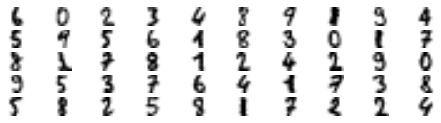

In [58]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [59]:
#이미지를 통한 수동 레이블
y_representative_digits = np.array([
    2, 0, 7, 9, 3, 6, 4, 8, 1, 1,
    8, 3, 0, 3, 4, 8, 5, 7, 2, 5,
    8, 6, 1, 2, 3, 0, 3, 1, 7, 9,
    1, 4, 2, 5, 6, 2, 8, 7, 9, 9, 
    3, 4, 6, 7, 6, 3, 7, 8, 1, 5
])

In [60]:
#대표 이미지를 통한 확률 : 확률 상승
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.1

In [61]:
#레이블 전파(Label Propagation)을 통한 정확도 향상, 이 레이블을 같은 클러스터에 있는 다른 모든 샘플에 전파
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [62]:
log_reg.score(X_test, y_test)

0.10888888888888888

In [63]:
#성능이 오르긴 했지만 전체 클러스터에 전파하면 일부 이상치를 포함하기 때문에
#레이블을 센트로이드에 가까윤 20번째 백분위수까지만 전파
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [64]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [65]:
log_reg.score(X_test, y_test)

0.1

In [66]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.12802768166089964

* 능동 학습
 - 모델과 훈련 세트를 지속적으로 향상하기 위해 능동 학습(Active Learning)을 몇 번 반복할 수 있다.
 - 전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청할 때 특정 샘플의 레이블을 제공
 - 불확실성 샘플링(Uncertainty Sampling)
   1. 지금까지 수집한 레이블된 샘플에서 모델을 훈련한다. 이 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만든다.
   2. 모델이 가장 불확실하게 예측한 샘플을 전문가에게 보내 레이블을 붙인다.
   3. 레이블이 부여하는 노력만큼의 성능이 향상되지 않을 때 까지 이를 반복한다.

## 9.1.6 DBSCAN

* 이 알고리즘은 밀집된 연속적 지역을 클러스터로 정의한다.
* 알고리즘이 각 샘플에서 작은 거리인 ε내에 샘플이 몇 개 놓여 있는지 센다. 이 지역을 ε-이웃(ε-neighborhood)이라고 부른다.
* ε-이웃 내에 적어도 min-samples개 샘플이 있다면 이를 핵심 샘플(core instance)로 간주한다.
* 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한다. 이웃에는 다른 핵심 샘플이 포함될 수 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.
* 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단한다.

In [166]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.05)

dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [106]:
#저장된 샘플의 레이블 (-1 : 이상치로 분류)
dbscan.labels_[:10]

array([ 0,  1,  2, -1,  3,  6,  1,  0,  4,  0], dtype=int64)

In [107]:
print( len(dbscan.core_sample_indices_), "\n" )

#핵심 샘플의 인덱스
print( dbscan.core_sample_indices_[:10] , "\n")

#핵심 샘플
print( dbscan.components_[:3] )

767 

[ 0  1  2  4  7  8  9 11 12 13] 

[[-0.69340956  0.74864576]
 [ 0.92560664  0.05604708]
 [ 1.15562723 -0.50217176]]


In [108]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [109]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [110]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

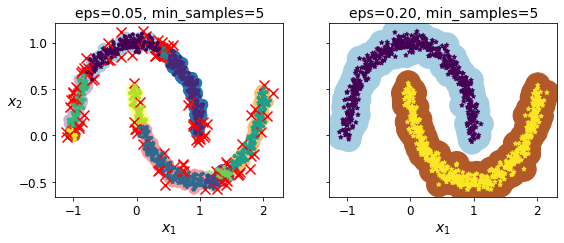

In [111]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [112]:
#예측하기 위해서는 다른 예측기를 선택해야 함
dbscan = dbscan2

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [113]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 0, 1], dtype=int64)

In [114]:
knn.predict_proba(X_new)

array([[0.86, 0.14],
       [0.  , 1.  ],
       [0.82, 0.18],
       [0.  , 1.  ]])

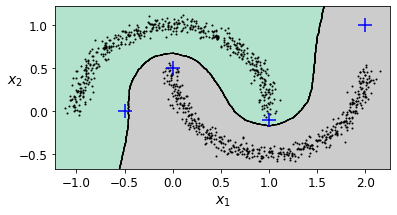

In [115]:
#최대 거리를 사용하면 두 클러스터에서 멀리 떨어진 샘플을 이상치로 간단히 분류
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

In [116]:
#KNeighborsClassifier의 kneighbors() : 훈련 세트에서 가장 가까운 k개 이웃의 거리와 인덱스를 반환
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1], dtype=int64)

* DBSCANM 클러스터의 모양과 개수에 상관없이 감지할 수 있는 능력이 있다.
* 이상치에 안정적이고 하이퍼파라미터가 두 개 뿐이다.
* 하지만 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내느것이 불가능하다.
* 계산복잡도는 O(m log m) 하지만 사이컷런의 구현은 eps가 커지면 O($m^2$)만큼 메모리가 필요하다.

## 9.1.7 다른 군집 알고리즘


 
 
* BIRCH(Balanced Iterative Reducing Using Hierarchies)
 - 특성 개수가 너무 많지 않다면( 20개 이하) 배치 k- 평균보다 빠르고 비슷한 결과를 만든다.
 - 훈련 과정에서 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조를 만든다.
 - 이 트리에 모든 샘플을 저장하지 않는다.
 - 이 방식은 제한된 메모리를 사용해 대용량 데이터셋을 다룰 수 있다.
  

* 평균-이동(Mean-Shift)
 - 각 샘플을 중심으로 하는 원을 그린다.
 - 그다음 원마다 안에 포함된 모든 샘플의 평균을 구한다.
 - 원의 중심을 평균점으로 이동시키낟.
 - 모든 원이 움직이지 않을 때 까지 이 평균-이동을 계속한다. 
 - 평균-이동은 지역의 최대 밀도를 찾을 때까지 높은 쪽으로 원을 이동시킨다.
 - 동일한 지역에 안착한 원에 있는 모든 샘플은 동일한 클러스터가 된다.
 - DBSCAN과 비슷하게 모양이나 개수에 상관없이 클러스터를 찾을 수 있고, 하이퍼 파라미터도 매우 적다.(bandwidth)
 - 국부적인 밀집도 추정에 의존한다. 하지만 평균-이동은 클러스터 내부 밀집도가 불균형할 때 여러 개로 나누는 경향이 있다.
 - 계산복잡도는 O($m^2$)이므로 대규모 데이터셋에는 적합하지 않다.
 
* 유사도 전파(Affinity Propagation)
 - 샘플은 자신을 대표할 수 있는 비슷한 샘플에 투표한다.
 - 알고리즘이 수렴하면 각 대표와 투표한 샘플이 클러스터를 형성한다.
 - 크기가 다른 여러 개의 클러스터를 감지할 수 있다.
 - 계산복잡도는 O($m^2$)이므로 대규모 데이터셋에는 적합하지 않다.
 


* 병합 군집(Agglomerative Clustering)
 - 인접한 클러스터 쌍을 연결한다.
 - 병합된 클러스터 쌍을 트리로 모두 그리면 클러스터의 이진 트리를 얻을 수 있다. 이 트리의 리프는 개별 샘플이다.
 - 병합 군집은 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지할 수 있다.
 - 특정 클러스터 개수를 선택하는 데 도움이 되는 유용한 클러스터 트리를 만들 수 있다.
 - 이는 어떤 작거리 (Pairwise Distance)와도 사용할 수 있다.
 - 이웃한 샘플 간의 거리를 담은 m x m 크기 희소 행렬을 연결 행렬로 전달하는 식으로 대규모 샘플에도 잘 적용할 수 있다. (연결횅렬이 없으면 대규모 데이터 셋으로 확장하기 어렵다.)

In [162]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [163]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

* 스펙트럼 군집(Spectral Clustering)
 - 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만든다. (차원 축소)
  - 이 저차원 공간에서 또 다른 군집 알고리즘을 사용한다. (사이킷런에서는 k-평균)
  - 스펙트럼 군집은 복잡한 클러스터 구조를 감지하고 그래프 컷(Grap Cut)을 찾는 데 사용할 수 있다.
  - 샘플 개수가 많으면 잘 적용되지 않고, 클러스터의 크기가 매우 다르면 잘 작동하지 않는다.

In [168]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

np.percentile(sc1.affinity_matrix_, 95)

def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

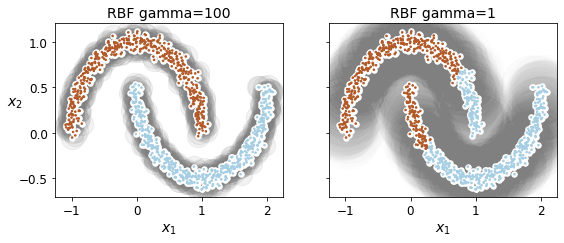

In [169]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

# 9.2 가우시안 혼합

* 가우시안 혼합 모델(Gaussian Mixture Model, GMM) :  샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델
* 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성한다. (클러스터는 타원형)
* 각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다르다.
* 샘플이 주어지면 가우시안 분포 중 하나에서 생성되었다는 것을 알 수 있지만 어떤 분포인지 또 이 분포의 파라미터는 무엇인지 알지 못한다.

In [180]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [151]:
#사이킷런의 GaussianMixture
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [152]:
#알고리즘이 추정한 파라미터
print(gm.weights_)
print("\n", gm.means_)
print("\n", gm.covariances_)

[0.2093669  0.39054348 0.40008962]

 [[ 3.40196611  1.05838748]
 [ 0.05224874  0.07631976]
 [-1.40754214  1.42716873]]

 [[[ 1.14296668 -0.03114176]
  [-0.03114176  0.9545003 ]]

 [[ 0.6890309   0.79717058]
  [ 0.79717058  1.21367348]]

 [[ 0.63496849  0.7298512 ]
  [ 0.7298512   1.16112807]]]


* 이 클래스는 기댓값-최대화(Expectation-Maximization, EM)알고리즘을 사용한다.
 - 샘플을 클러스터에 할당한다. (기댓값 단계)
 - 그 다음 클러스터를 업데이트 한다. (최대화 단계)
* 클러스터에 속할 추정 확률로 샘플에 가중치가 적용된다. 이 확률은 샘플에 대한 클러스터의 책임(Reponsibility)라고 부른다.
 - 최대화 단계에서 클러스터 업데이트는 책임이 가장 많은 샘플에 크게 영향을 받는다

In [153]:
#이 알고리즘이 수렴했는가?
print(gm.converged_)
#몇번 반복했는가?
print(gm.n_iter_)

True
4


In [154]:
#특정 클러스터에 속할 확률 예측
print( gm.predict(X) )
print( gm.predict_proba(X) )

[1 1 2 ... 0 0 0]
[[2.27715290e-02 9.77227791e-01 6.79898914e-07]
 [1.60345103e-02 9.83288385e-01 6.77104389e-04]
 [1.90251273e-06 7.51824662e-05 9.99922915e-01]
 ...
 [9.99999565e-01 4.35053542e-07 2.17938894e-26]
 [1.00000000e+00 5.27837047e-16 1.50679490e-41]
 [1.00000000e+00 2.32355608e-15 8.21915701e-41]]


In [155]:
#가우시안 혼합 모델은 생성 모델(Generative Model)로 새로운 샘플을 만들 수 있다.
X_new, y_new = gm.sample(6)
X_new

array([[ 3.46332649,  1.27018236],
       [ 0.67450718,  1.12205494],
       [ 0.51889547,  1.2481949 ],
       [-2.1167886 ,  0.33557929],
       [-1.47974592,  1.58756765],
       [-1.98433843,  1.22900626]])

In [156]:
y_new

array([0, 1, 1, 2, 2, 2])

In [157]:
#score_samples() 메서드로 샘플 위치의 확률 밀도 함수(Probability Density Function, PDF)의 로그를 예측
gm.score_samples(X)

array([-2.60674489, -3.57074133, -3.33007348, ..., -3.51379355,
       -4.39643283, -3.8055665 ])

In [158]:
#전체 공간에 대해 이 PDF를 적분하면 1에 매우 가까워진다.
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999271592

In [184]:
#클러스터 평균, 결정경꼐, 밀도 등고선 시각화
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

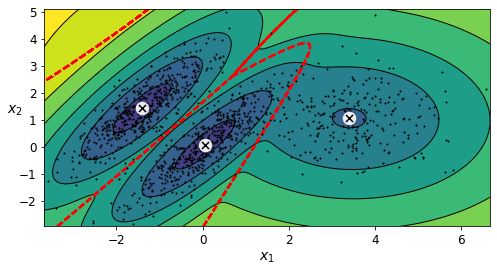

In [185]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

* 특성이나 클러스터가 많거나 샘플이 적을 떄는 EM이 최적의 솔루션으로 수렴하기 어렵다. 이런 작업의 어려움을 줄이려면 알고리즘이 학습할 파라미터 개수를 제한해야 한다.
* 이를 위해 공분산 행렬에 제약을 추가할 수 있다.
* 사이킷런의 convariance_type 매개변수 중 하나를 설정
 - spherical : 모든 클러스터가 원형 / 지름(분산)이 다를 수 있다.
 - diag : 클러스터는 크기에 상관없이 어떤 타원형도 가능 / 타원의 축은 좌표 축과 나란(공분산 행렬이 대각 행렬)
 - tied : 모든 클러스터가 동일한 타원 모양, 크기, 방향(동일한 공분산 행렬을 공유)

In [186]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [187]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

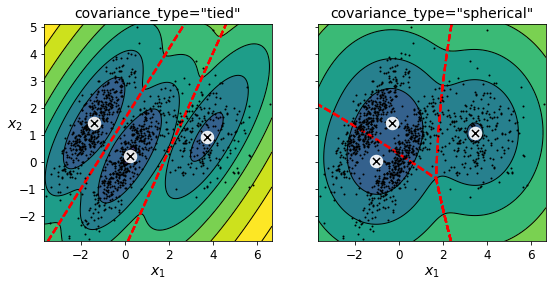

In [188]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

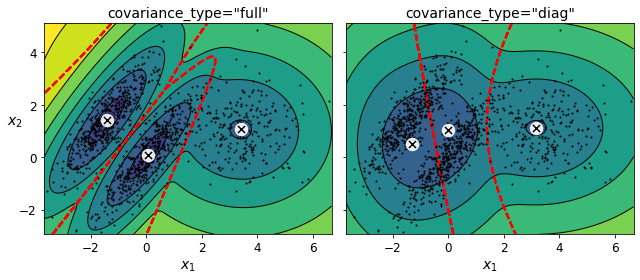

In [189]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## 9.2.1 가우시안 혼합을 사용한 이상치 탐지

* 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있다.
* 밀도 임계값을 정해서 사용(거짓 양성이 너무 많다면 임계값을 더 낮춘다.)

In [190]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

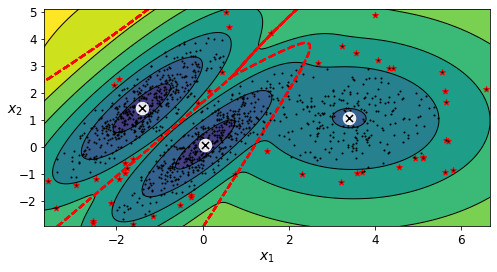

In [191]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

* 특이치 탐지(Novelty Detection)
 - 이상치로 오염되지 않은 깨끗한 데이터셋에서 훈련한다는 것이 이상치 탐지와 다르다.
 - 데이터셋을 정제하는 데 자주 사용

## 9.2.2 클러스터 개수 선택하기

* 가우시안 혼합에서는 BIC(Bayesian Information Criterion) / AIC(Akaike Information Criterion)같은 이론적 정보 기준(Theoretical Information Criterion)을 최소화 하는  모델을 찾는다.

* ${BIC} = {\log(m)p - 2\log({\hat L})}$
* ${AIC} = 2p - 2\log(\hat L)$
 - m 샘플의 개수 / p는 모델이 학습할 파라미터 개수 / L은 모델의 기능도 함수의 최댓값

In [194]:
print( gm.bic(X) )
print( gm.aic(X) )

8189.662685850679
8102.437405735641


In [195]:
#BIC 수동으로 구하기
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [197]:
print( bic, aic )
print( n_params )

8189.662685850679 8102.437405735641
17


* 클러스터마다 하나의 가중치가 있지만 모두 더하면 1이 되어야 합니다. 따라서 자유도는 1이 줄어듭니다. 비슷하게 $n \times n$ 공분산 행렬의 자유도는 $n^2$가 아니라 $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$입니다.

In [198]:
#여러 가지 $k$ 값에 대해 가우시안 혼합 모델을 훈련하고 BIC를 측정
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]


bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

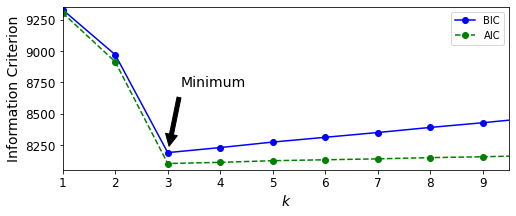

In [199]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()

plt.show()

In [200]:
#클러스터 개수와 covariance_type 하이퍼파라미터의 최적의 조합
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [201]:
print( best_k )
print( best_covariance_type )

3
full


* 기능도 함수(Likelihood Function)
 - 확률과 기능도는 종종 구별 없이 사용되기도 한다.
 - 확률은 미래 출력 x가 얼마나 그럴듯한지 설명한다.
 - 기능도는 출력 x를 알고 있을 때 특정 파라미터 값이 얼마나 그럴듯한지 설명한다.
 

## 9.2.3 베이지 가우시안 혼합 모델

* 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드난 BayesianGaussianMixture 클래스를 사용할 수 있다.
* 최적의 클러스터 개수보다 큰 컴포넌트의 개수를 지정
* 이 알고리즘은 자동으로 불필요한 클러스터를 제거

In [203]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components = 10, n_init = 10, random_state = 42)
bgm.fit(X)
np.round(bgm.weights_, 2)

C:\Users\uoo1325\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

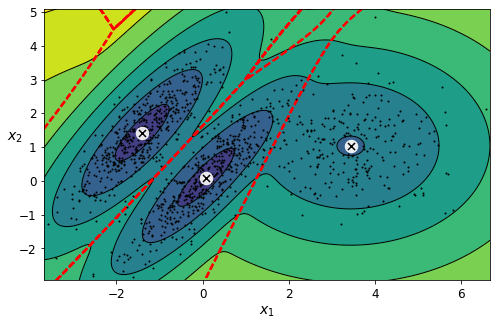

In [204]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

* 이 모델에서 클러스터 파라미터는 더는 고정된 모델 파라미터가 아니라 클러스터 할당처럼 잠재 확률 변수로 취급된다.

In [205]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [206]:
np.round(bgm_low.weights_, 2)

array([0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [207]:

np.round(bgm_high.weights_, 2)

array([0.43, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01, 0.37, 0.01, 0.01])

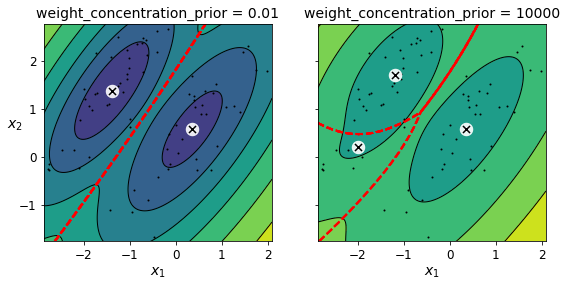

In [212]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

In [210]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

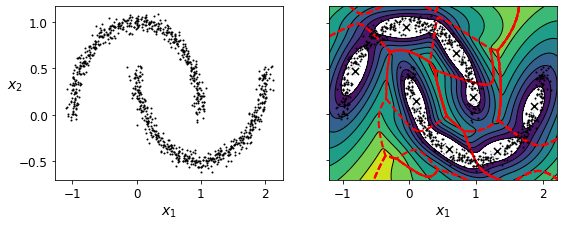

In [211]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()